In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

#### Создание выборки

In [ ]:
# Предварительное масштабирование
# X = (X - X.mean(axis=0))/ X.std()

In [2]:
# Функция, создающая массив с выбросами 

def make_toy_outlier(n_samples = 300, outliers_fraction = 0.15):
    
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    np.random.seed(0)

    X = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
                   random_state=0, n_samples=n_inliers, n_features=2)[0]
    outliers = np.random.uniform(low=-6, high=6,
                                 size=(n_outliers, 2))

    
    return X, outliers

In [3]:
X, outliers = make_toy_outlier()
X[:10]

array([[-2.33804774, -2.21920333],
       [-2.10940806, -1.95298884],
       [-2.40027754, -2.40401525],
       [-1.94020994, -2.01518106],
       [ 5.24485392,  4.00479192],
       [-2.34720658, -2.09368768],
       [-2.08270116, -2.21291839],
       [-2.09273433, -2.07004   ],
       [-0.42084677,  1.68088958],
       [-2.48979036, -2.47033032]])

In [4]:
outliers[:10]

array([[ 0.58576205,  2.5822724 ],
       [ 1.23316051,  0.5385982 ],
       [-0.91614241,  1.75072936],
       [-0.74895346,  4.70127601],
       [ 5.56395313, -1.39870177],
       [ 3.50070046,  0.34673904],
       [ 0.81653473,  5.10715966],
       [-5.1475673 , -4.9544484 ],
       [-5.75737923,  3.99143815],
       [ 3.33788101,  4.44014578]])

In [5]:
X, outliers = make_toy_outlier(n_samples = 300, outliers_fraction = 0.15)
X = np.r_[X, outliers]   # r_ преобразует срез в строку

In [6]:
X[:10]

array([[-2.33804774, -2.21920333],
       [-2.10940806, -1.95298884],
       [-2.40027754, -2.40401525],
       [-1.94020994, -2.01518106],
       [ 5.24485392,  4.00479192],
       [-2.34720658, -2.09368768],
       [-2.08270116, -2.21291839],
       [-2.09273433, -2.07004   ],
       [-0.42084677,  1.68088958],
       [-2.48979036, -2.47033032]])

#### K-Means

In [ ]:
model = KMeans(n_clusters=8, random_state=0)

X_prediction = model.fit_predict(X)  # labels
centers = model.cluster_centers_     # координаты центроидов


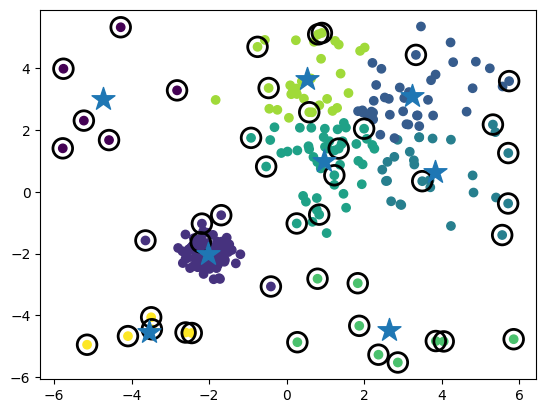

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=X_prediction)
plt.scatter(outliers[:, 0], outliers[:, 1],
            edgecolors='k', s=200, facecolors='none', linewidths=2)  # реальные выбросы в кружочках
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300)         # центроиды
plt.show()

#### DBSCAN

In [53]:
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
labels = db.labels_

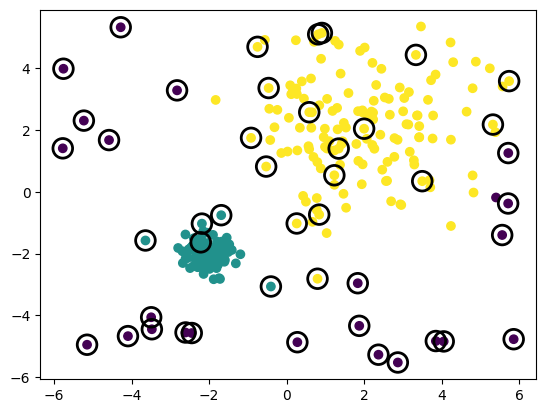

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(outliers[:, 0], outliers[:, 1],
            edgecolors='k', s=200, facecolors='none', linewidths=2)  # реальные выбросы в кружочках
plt.show()

#### Isolation Forest

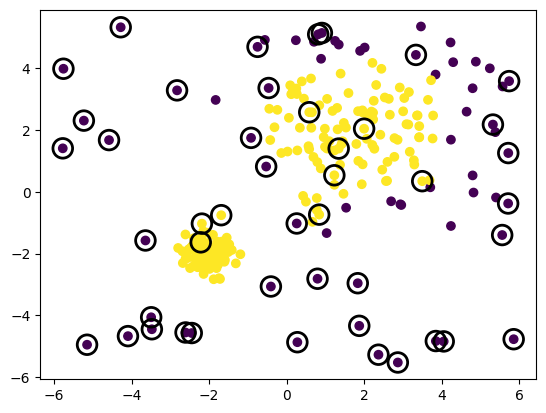

In [66]:
isolat = IsolationForest(n_estimators=100, max_samples=300, random_state=0)
X_pred_isolat = isolat.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=X_pred_isolat)
plt.scatter(outliers[:, 0], outliers[:, 1],
            edgecolors='k', s=200, facecolors='none', linewidths=2)  # реальные выбросы в кружочках
plt.show()

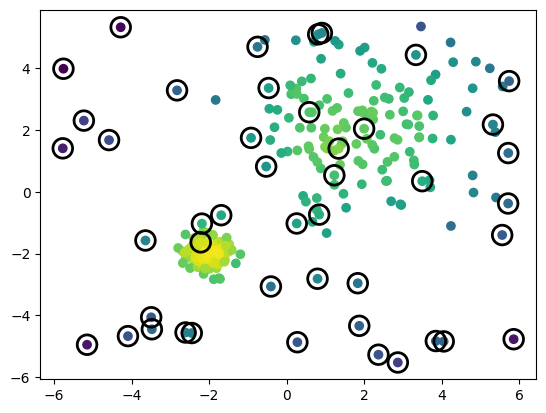

In [65]:
# Оценка
score = isolat.decision_function(X)

plt.scatter(X[:, 0], X[:, 1], c=score)
plt.scatter(outliers[:, 0], outliers[:, 1],
            edgecolors='k', s=200, facecolors='none', linewidths=2)  # реальные выбросы в кружочках
plt.show()